# Gaussian Process

The Gaussian process is a non-linear regression technique to estimate new unknown values from a set of given values. It basically fits the data with sets of functions, which is estimated in each point using a random value and gaussian uncertainties, and finally fits the data with a line+/- some uncertainty area.

### Example:

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
from astroML.utils import split_samples
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import r2_score

%matplotlib inline

In [2]:
# Load data
wds = np.load("data/SDSS_DR7_WDs.npy") # the format is python binary numpy format
photo_bands = ['u', 'g', 'r', 'i', 'z']
X = np.column_stack(wds[photo_bands[i]]-wds[photo_bands[i+1]] for i in range(4))
y = wds['Teff']

# take 10% of the data because GPR is slow...
X = X[:len(X) // 10]
y = y[:len(y) // 10]
print("Size of 'X': ", X.shape[0], "x", X.shape[1])
print("Size of 'y': ", len(y))

("Size of 'X': ", 1341, 'x', 4)
("Size of 'y': ", 1341)


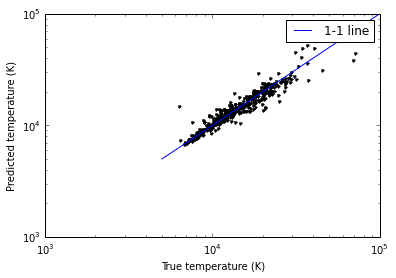

NameError: name 'y_out' is not defined

In [3]:
def do_gpr():
    (X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.7, 0.3], random_state=0)
    gpr = GaussianProcessRegressor(kernel=RBF(length_scale=0.1), normalize_y=True, alpha=1.0)
    gpr.fit(X_train, y_train)
    y_pred, y_err = gpr.predict(X_test,return_std=True)
    return y_test, y_pred, y_err


# get test y-value and predicted ones
y_test, y_pred, y_err = do_gpr()


plt.figure()
plt.loglog(y_test, y_pred, "k.")
plt.loglog([5e3,1e5],[5e3,1e5],label='1-1 line')
plt.xlabel("True temperature (K)")
plt.ylabel("Predicted temperature (K)")
plt.legend()
plt.show()

print("Coefficient of determination:", r2_score(y_test, y_out))
print("Mean error", np.mean(y_err))